# **MOVIE2IMG**

MP4ファイルをjpgファイルに分割

In [13]:
import cv2
import os
from tqdm import tqdm

def extract_frames(video_path, output_dir):
    # 出力ディレクトリの作成
    os.makedirs(output_dir, exist_ok=True)
    
    # 動画の読み込み
    cap = cv2.VideoCapture(video_path)
    
    # 総フレーム数の取得
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # tqdmで進捗バーを表示
    with tqdm(total=total_frames, desc='フレーム抽出中') as pbar:
        frame_count = 0
        
        while True:
            # フレームの読み込み
            ret, frame = cap.read()
            
            # 読み込みが終了したらループを抜ける
            if not ret:
                break
                
            # フレームを保存
            output_path = os.path.join(output_dir, f'{os.path.basename(output_dir)}_{frame_count:04d}.jpg')
            cv2.imwrite(output_path, frame)
            
            frame_count += 1
            pbar.update(1)
        
    # キャプチャの解放
    cap.release()
    
    print(f'\n合計 {frame_count} フレームを抽出しました')

def main():
    # 入力動画のパス
    video_path = r'ROP_video\IMG_1703.mp4'
    
    # 出力ディレクトリ
    output_dir = r'ROP_image\IMG_1703'
    
    # フレーム抽出の実行
    extract_frames(video_path, output_dir)

if __name__ == '__main__':
    main()

フレーム抽出中: 100%|██████████| 888/888 [00:40<00:00, 22.12it/s]


合計 888 フレームを抽出しました


# **複数ビデオを一括して画像に**

In [ ]:
# 複数ファイルを一括処理（親フォルダ固定＋basenameリスト指定）
import cv2
import os
from tqdm import tqdm

def extract_frames(video_path, output_dir):
    # 出力ディレクトリの作成
    os.makedirs(output_dir, exist_ok=True)
    
    # 動画の読み込み
    cap = cv2.VideoCapture(video_path)
    
    # 総フレーム数の取得
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # tqdmで進捗バーを表示
    with tqdm(total=total_frames, desc='フレーム抽出中') as pbar:
        frame_count = 0
        
        while True:
            # フレームの読み込み
            ret, frame = cap.read()
            
            # 読み込みが終了したらループを抜ける
            if not ret:
                break
                
            # フレームを保存
            output_path = os.path.join(output_dir, f'{os.path.basename(output_dir)}_{frame_count:04d}.jpg')
            cv2.imwrite(output_path, frame)
            
            frame_count += 1
            pbar.update(1)
        
    # キャプチャの解放
    cap.release()
    
    print(f'\n合計 {frame_count} フレームを抽出しました')

##----------------------------------------------------------
# 親フォルダ（必要に応じて編集）
parent_video_dir = os.path.join('..', 'data', 'ROP_video')
parent_output_dir = os.path.join('..', 'data', 'ROP_image')
video_ext_candidates = ['.mp4', '.mov', '.MOV']

# 対象basenameをリストで指定（例）
basenames = [
    'IMG_0573',
    'IMG_1727',
    'IMG_1731',
    'IMG_1735',
    'IMG_1891',
    'IMG_1899',
    'IMG_1902',
    'IMG_1965',
    'IMG_1968',
    'IMG_2025',
    'IMG_2118',
    'IMG_2123',
    'mytemp2_2',
    'mytemp2',
]
##----------------------------------------------------------


print(f"親動画フォルダ: {os.path.abspath(parent_video_dir)}")
print(f"親出力フォルダ: {os.path.abspath(parent_output_dir)}")

for base in tqdm(basenames, desc='動画ごとの処理'):
    # 拡張子候補から実在ファイルを探索
    video_path = None
    tried = []
    for ext in video_ext_candidates:
        candidate = os.path.join(parent_video_dir, base + ext)
        tried.append(candidate)
        if os.path.exists(candidate):
            video_path = candidate
            break

    if video_path is None:
        print(f"スキップ: 動画が見つかりません -> {base}\n  試行パス: {tried}")
        continue

    print(f"処理対象: {video_path}")
    output_dir = os.path.join(parent_output_dir, base)
    extract_frames(video_path, output_dir)


親動画フォルダ: c:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_video
親出力フォルダ: c:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image


動画ごとの処理:   0%|          | 0/14 [00:00<?, ?it/s]

処理対象: ..\data\ROP_video\IMG_0573.mov


動画ごとの処理:   7%|▋         | 1/14 [01:14<16:14, 74.96s/it]


合計 1625 フレームを抽出しました
処理対象: ..\data\ROP_video\IMG_1727.mov


動画ごとの処理:  14%|█▍        | 2/14 [02:05<12:07, 60.63s/it]


合計 1168 フレームを抽出しました
処理対象: ..\data\ROP_video\IMG_1731.mov


動画ごとの処理:  21%|██▏       | 3/14 [02:42<09:08, 49.83s/it]


合計 827 フレームを抽出しました
処理対象: ..\data\ROP_video\IMG_1735.mov


動画ごとの処理:  29%|██▊       | 4/14 [03:13<07:03, 42.33s/it]


合計 697 フレームを抽出しました
処理対象: ..\data\ROP_video\IMG_1891.mov


動画ごとの処理:  36%|███▌      | 5/14 [03:36<05:19, 35.50s/it]


合計 518 フレームを抽出しました
処理対象: ..\data\ROP_video\IMG_1899.mov


動画ごとの処理:  43%|████▎     | 6/14 [04:19<05:04, 38.11s/it]


合計 960 フレームを抽出しました
処理対象: ..\data\ROP_video\IMG_1902.mov


動画ごとの処理:  50%|█████     | 7/14 [04:51<04:11, 35.87s/it]


合計 716 フレームを抽出しました
処理対象: ..\data\ROP_video\IMG_1965.mov


動画ごとの処理:  57%|█████▋    | 8/14 [07:33<07:35, 75.97s/it]


合計 3451 フレームを抽出しました
処理対象: ..\data\ROP_video\IMG_1968.mov


動画ごとの処理:  64%|██████▍   | 9/14 [08:00<05:03, 60.72s/it]


合計 595 フレームを抽出しました
処理対象: ..\data\ROP_video\IMG_2025.mov


動画ごとの処理:  71%|███████▏  | 10/14 [08:34<03:30, 52.63s/it]


合計 787 フレームを抽出しました
処理対象: ..\data\ROP_video\IMG_2118.mov


動画ごとの処理:  79%|███████▊  | 11/14 [10:11<03:18, 66.28s/it]


合計 2112 フレームを抽出しました
処理対象: ..\data\ROP_video\IMG_2123.mov


動画ごとの処理:  86%|████████▌ | 12/14 [10:35<01:46, 53.39s/it]


合計 547 フレームを抽出しました
処理対象: ..\data\ROP_video\mytemp2_2.mov


動画ごとの処理:  93%|█████████▎| 13/14 [11:14<00:48, 48.77s/it]


合計 1429 フレームを抽出しました
処理対象: ..\data\ROP_video\mytemp2.mov


動画ごとの処理: 100%|██████████| 14/14 [11:58<00:00, 51.29s/it]


合計 1704 フレームを抽出しました


# **Whole image to lens_image**

In [ ]:
import os
import cv2
import glob
import shutil
import numpy as np
from tqdm import tqdm
from ultralytics import RTDETR

# =========================
# 設定
# =========================
PARENT_DIR = r"C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image"
IMAGE_SUBDIRS = [
    "IMG_0573",
    "IMG_1727",
    "IMG_1731",
    "IMG_1735",
    "IMG_1891",
    "IMG_1899",
    "IMG_1902",
    "IMG_1965",
    "IMG_1968",
    "IMG_2025",
    "IMG_2118",
    "IMG_2123",
    "mytemp2_2",
    "mytemp2"
]
IMAGE_SUBDIRS = [
    "IMG_0573",
    "IMG_1727",
    "IMG_1731",
    "IMG_1735",
    "IMG_1891",
    "IMG_1899",
    "IMG_1902",
    "IMG_1965",
    "IMG_1968",
    "IMG_2025",
    "IMG_2118",
    "IMG_2123",
    "mytemp2_2",
    "mytemp2"
]

LABEL_SUBDIRS = [
    "LABELS_0573",
    "LABELS_1727",
    "LABELS_1731",
    "LABELS_1735",
    "LABELS_1891",
    "LABELS_1899",
    "LABELS_1902",
    "LABELS_1965",
    "LABELS_1968",
    "LABELS_2025",
    "LABELS_2118",
    "LABELS_2123",
    "LABELS_mytemp2_2",
    "LABELS_mytemp2"
]

MODEL_PATH = r"C:\Users\ykita\ROP_AI_project\ROP_project\models\rtdetr-l-1697_1703.pt"

VALID_EXT = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")

CONF_THRES = 0.25
IOU_THRES = 0.45
MAX_DETS = 300


# =========================
# ユーティリティ
# =========================
def reset_dir(path: str):
    if os.path.exists(path):
        shutil.rmtree(path)
    os.makedirs(path, exist_ok=True)

def ensure_dir(path: str):
    os.makedirs(path, exist_ok=True)

def save_yolo_label_txt(save_dir: str, base_stem: str, boxes_xywhn, cls_ids):
    """YOLO形式のラベル保存。basenameは画像と同じ。"""
    ensure_dir(save_dir)
    label_path = os.path.join(save_dir, f"{base_stem}.txt")
    lines = []
    for (xc, yc, w, h), cid in zip(boxes_xywhn, cls_ids):
        lines.append(f"{int(cid)} {xc:.6f} {yc:.6f} {w:.6f} {h:.6f}")
    with open(label_path, "w", encoding="utf-8") as f:
        f.write("\n".join(lines))

def crop_with_xyxy(image, box_xyxy, out_path):
    """xyxy(px) の矩形で1枚クロップして保存。"""
    h, w = image.shape[:2]
    x1, y1, x2, y2 = box_xyxy
    x1 = max(0, int(np.floor(x1)))
    y1 = max(0, int(np.floor(y1)))
    x2 = min(w, int(np.ceil(x2)))
    y2 = min(h, int(np.ceil(y2)))
    if x2 <= x1 or y2 <= y1:
        return False
    crop = image[y1:y2, x1:x2]
    return cv2.imwrite(out_path, crop)

def circular_mask_internal_process(src_dir: str, dst_dir: str):
    """クロップ画像に円形マスクをかけて保存。"""
    reset_dir(dst_dir)
    files = [f for f in os.listdir(src_dir) if f.lower().endswith(VALID_EXT)]
    for fname in tqdm(files, desc=f"{os.path.basename(src_dir)} → internal処理"):
        in_path = os.path.join(src_dir, fname)
        out_path = os.path.join(dst_dir, fname)
        img = cv2.imread(in_path)
        if img is None:
            continue
        h, w = img.shape[:2]
        aspect = h / w if w > 0 else 0
        if 0.8 <= aspect <= 1.2:
            cx, cy = w // 2, h // 2
            radius = (h + w) // 4
            mask = np.zeros((h, w), dtype=np.uint8)
            cv2.circle(mask, (cx, cy), radius, 255, -1)
            result = img.copy()
            result[mask == 0] = (114, 114, 114)
            cv2.imwrite(out_path, result)
        else:
            cv2.imwrite(out_path, img)


# =========================
# メイン処理
# =========================
def main():
    if len(IMAGE_SUBDIRS) != len(LABEL_SUBDIRS):
        raise ValueError("IMAGE_SUBDIRS と LABEL_SUBDIRS の長さが一致していません。")

    model = RTDETR(MODEL_PATH)

    for img_subdir, lbl_subdir in zip(IMAGE_SUBDIRS, LABEL_SUBDIRS):
        image_dir = os.path.join(PARENT_DIR, img_subdir)
        if not os.path.isdir(image_dir):
            print(f"[WARN] 画像ディレクトリが見つかりません: {image_dir}")
            continue

        label_out_dir = os.path.join(PARENT_DIR, lbl_subdir)
        lens_dir      = os.path.join(PARENT_DIR, f"{img_subdir}_lens_inf")
        lens_int_dir  = os.path.join(PARENT_DIR, f"{img_subdir}_lens_internal")

        reset_dir(label_out_dir)
        reset_dir(lens_dir)

        image_paths = sorted(
            [p for p in glob.glob(os.path.join(image_dir, "*")) if p.lower().endswith(VALID_EXT)]
        )
        if len(image_paths) == 0:
            print(f"[INFO] 対象画像がありません: {image_dir}")
            reset_dir(lens_int_dir)
            continue

        for img_path in tqdm(image_paths, desc=f"{img_subdir} 推論"):
            img = cv2.imread(img_path)
            if img is None:
                continue
            base = os.path.splitext(os.path.basename(img_path))[0]

            results = model(img_path, save=False, conf=CONF_THRES, iou=IOU_THRES, max_det=MAX_DETS)

            all_xywhn = []
            all_cls = []
            all_xyxy = []

            for r in results:
                if r.boxes is None or len(r.boxes) == 0:
                    continue
                boxes = r.boxes
                cls_ids = boxes.cls.cpu().numpy().astype(int) if hasattr(boxes, "cls") else np.zeros((len(boxes),), dtype=int)
                if hasattr(boxes, "conf") and boxes.conf is not None:
                    confs = boxes.conf.cpu().numpy()
                    keep = confs >= CONF_THRES
                    if keep.sum() == 0:
                        continue
                    cls_ids = cls_ids[keep]
                    xyxy = boxes.xyxy.cpu().numpy()[keep]
                    xywhn = boxes.xywhn.cpu().numpy()[keep]
                else:
                    xyxy = boxes.xyxy.cpu().numpy()
                    xywhn = boxes.xywhn.cpu().numpy()

                all_xywhn.append(xywhn)
                all_cls.append(cls_ids)
                all_xyxy.append(xyxy)

            if len(all_xywhn) > 0:
                all_xywhn = np.concatenate(all_xywhn, axis=0)
                all_cls   = np.concatenate(all_cls, axis=0)
                all_xyxy  = np.concatenate(all_xyxy, axis=0)

                # 1) ラベルは常に保存（複数検出なら複数行）
                save_yolo_label_txt(label_out_dir, base, all_xywhn, all_cls)

                # 2) 画像は「検出がちょうど1つのときのみ」保存
                if all_xyxy.shape[0] == 1:
                    out_path = os.path.join(lens_dir, f"{base}.jpg")
                    crop_with_xyxy(img, all_xyxy[0], out_path)
                # 検出が2つ以上の場合：画像は保存しない
                # 検出が0の場合：そもそもここに来ない（ラベルも作らない）

        # クロップ済み画像のみ internal 処理（無ければ空のまま）
        circular_mask_internal_process(lens_dir, lens_int_dir)

    print("\nすべて完了しました。")


if __name__ == "__main__":
    main()


# **Inference YOLO-seg to CVAT annotation file**

# ROP YOLO-Seg 推論データ作成（簡易説明）

## 目的
親フォルダ配下の画像を **YOLO-Seg** で推論し、**YOLO-Seg形式（多角形）** のラベルと最小学習セット（`labels/Train/*.txt`、`Train.txt`、`data.yaml`）を生成してZIP化する。

---

## 入力
- 親フォルダ: `C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image`
- 子フォルダ例: `["IMG_0573_lens_internal"]`
- モデル: `C:\Users\ykita\ROP_AI_project\ROP_project\models\yolo11m-seg_1699+1702-1703_internal.pt`
- 画像拡張子: jpg/jpeg/png/tif/tiff（大小文字対応）

## 出力
- ルート: `C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\{sub}_seg\`
- 構成（例）
    
        {sub}_seg/
          data.yaml
          Train.txt
          labels/
            Train/
              IMG_0573_0000.txt
              IMG_0573_0001.txt
              ...

- ZIP: `{sub}_seg.zip`

## 推論設定
- `conf=0.25`（既定）
- `iou=0.45`（既定）
- `retina_masks=True`（元画像サイズの高精細マスク → ポリゴン精度向上）
- クラス: `0: Fundus`, `1: Disc`, `2: Macula`

## ファイル内容サンプル
- `data.yaml`
    
        Train: Train.txt
        names:
          0: Fundus
          1: Disc
          2: Macula
        path: .

- `Train.txt`
    
        data/images/Train/IMG_0573_0000.jpg
        data/images/Train/IMG_0573_0001.jpg
        ...

## YOLO-Seg ラベル形式
- 1行=1インスタンス  
  `cls x1 y1 x2 y2 ...`（x,y は **0–1正規化**）
- 頂点が3未満の多角形はスキップ
- 検出0件でも **空ファイル** を作成（下流処理の一貫性のため）

## 処理フロー
1) 子フォルダ内の画像を列挙 → `Train.txt` 作成  
2) 画像ごとに YOLO-Seg 推論（上記設定）  
3) `r.masks.xyn` と `r.boxes.cls` から **YOLO-Seg形式** を `labels/Train/{basename}.txt` へ出力  
4) `data.yaml` 生成 → フォルダごとZIP化

## はまったポイント
- TXTの改行形式がLF 改行（UNIX）形式でないとcvatとラベルが一致しないので保存時に明示が必要

In [ ]:
##これだと視神経乳頭が眼底から分離されてしまう

import os
import cv2
import shutil
import numpy as np
from pathlib import Path
from tqdm import tqdm
from ultralytics import YOLO

# ========= 設定 =========
PARENT_DIR  = r"C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image"
SUBFOLDERS  = ["IMG_0573_lens_internal"]   # 複数フォルダ指定可
OUTPUT_ROOT = r"C:\Users\ykita\ROP_AI_project\ROP_project\data\inference"
MODEL_PATH  = r"C:\Users\ykita\ROP_AI_project\ROP_project\models\yolo11m-seg_1699+1702-1703_internal.pt"

CONF_THRES = 0.25
IOU_THRES  = 0.45

# クラスID → 名前
CLASS_ID_TO_NAME = {0: "Fundus", 1: "Disc", 2: "Macula"}
# クラスIDごとの均等点数
CLASS_ID_TO_POINTS = {0: 60, 1: 20, 2: 10}


# ========= 輪郭処理ユーティリティ =========
def resample_contour_evenly(contour_xy, n_points=100, ensure_closed=True):
    """輪郭を曲線長に沿って均等間隔にサンプリング"""
    c = contour_xy
    if c.ndim == 3 and c.shape[1] == 1:
        c = c.reshape(-1, 2)
    if len(c) == 0:
        return np.zeros((0, 2), dtype=np.float32)
    if len(c) == 1:
        return np.repeat(c.astype(np.float32), n_points, axis=0)

    is_closed = np.allclose(c[0], c[-1])
    cc = c.copy()
    if ensure_closed and not is_closed:
        cc = np.vstack([cc, cc[0]])

    seg = np.linalg.norm(np.diff(cc, axis=0), axis=1)
    s = np.concatenate([[0.0], np.cumsum(seg)])
    total = s[-1]

    if total < 1e-9 or n_points <= 0:
        return np.zeros((0, 2), dtype=np.float32)

    if ensure_closed:
        K = max(1, n_points - 1)
        t = np.linspace(0.0, total, K, endpoint=False)
    else:
        t = np.linspace(0.0, total, n_points, endpoint=True)

    out = np.zeros((len(t), 2), dtype=np.float32)
    for i, ti in enumerate(t):
        j = np.searchsorted(s, ti, side="right") - 1
        j = max(0, min(j, len(cc) - 2))
        denom = max(s[j+1] - s[j], 1e-12)
        alpha = (ti - s[j]) / denom
        out[i] = (1.0 - alpha) * cc[j] + alpha * cc[j+1]

    if ensure_closed:
        if len(out) == n_points:
            out[-1] = out[0]
        else:
            out = np.vstack([out, out[0:1]])
    return out


def largest_external_contour(mask_uint8):
    cnts, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    if not cnts:
        return None
    cnt = max(cnts, key=cv2.contourArea)
    return cnt.reshape(-1, 2)


def yolo_poly_line_from_mask(mask, n_points, ensure_closed=True):
    mask_uint8 = (mask.astype(np.uint8) * 255) if mask.max() <= 1 else mask.astype(np.uint8)
    contour = largest_external_contour(mask_uint8)
    if contour is None or len(contour) < 3:
        return np.zeros((0, 2), dtype=np.float32)
    return resample_contour_evenly(contour, n_points=n_points, ensure_closed=ensure_closed)


def contours_from_results(results, class_id_to_points, ensure_closed=True):
    outs = []
    for r in results:
        if r.masks is None or r.boxes is None or len(r.masks.data) == 0:
            continue
        masks = r.masks.data.cpu().numpy()
        cls_ids = r.boxes.cls.cpu().numpy().astype(int)
        confs   = r.boxes.conf.cpu().numpy()
        N = min(len(masks), len(cls_ids), len(confs))
        for i in range(N):
            cid = int(cls_ids[i])
            npts = class_id_to_points.get(cid, 0)
            if npts <= 0:
                continue
            mask = masks[i]
            contour = yolo_poly_line_from_mask(mask, n_points=npts, ensure_closed=ensure_closed)
            outs.append((cid, contour))
    return outs


def to_yolo_seg_line(contour_xy, class_id, W, H):
    if contour_xy is None or len(contour_xy) < 3:
        return ""
    xy = contour_xy.astype(np.float32).copy()
    xy[:, 0] = np.clip(xy[:, 0] / float(W), 0.0, 1.0)
    xy[:, 1] = np.clip(xy[:, 1] / float(H), 0.0, 1.0)
    coords = " ".join(f"{x:.6f} {y:.6f}" for x, y in xy)
    return f"{class_id} {coords}"


# ========= メイン処理 =========
def recreate_dir(p: str):
    if os.path.exists(p):
        shutil.rmtree(p)
    os.makedirs(p, exist_ok=True)


def write_data_yaml(out_dir: str):
    yaml_content = "Train: Train.txt\nnames:\n  0: Fundus\n  1: Disc\n  2: Macula\npath: .\n"
    with open(os.path.join(out_dir, "data.yaml"), "w", encoding="utf-8", newline="\n") as f:
        f.write(yaml_content)


def create_zip(src_dir: str) -> str:
    zip_path = src_dir + ".zip"
    if os.path.exists(zip_path):
        os.remove(zip_path)
    shutil.make_archive(src_dir, 'zip', src_dir)
    return zip_path


def process_and_export():
    model = YOLO(MODEL_PATH)

    for sub in SUBFOLDERS:
        src_dir = Path(PARENT_DIR) / sub
        if not src_dir.is_dir():
            print(f"[WARN] 入力フォルダなし: {src_dir}")
            continue

        out_dir = Path(OUTPUT_ROOT) / f"{sub}_seg"
        recreate_dir(out_dir)
        labels_train_dir = out_dir / "labels" / "Train"
        labels_train_dir.mkdir(parents=True, exist_ok=True)

        # data.yaml と Train.txt
        write_data_yaml(str(out_dir))
        train_txt_path = out_dir / "Train.txt"

        imgs = [p for p in src_dir.iterdir() if p.suffix.lower() in {".jpg", ".jpeg", ".png", ".tif", ".tiff"}]
        imgs = sorted(imgs, key=lambda p: p.name.lower())
        if not imgs:
            print(f"[INFO] 画像が見つかりません: {src_dir}")
            continue

        with open(train_txt_path, "w", encoding="utf-8", newline="\n") as ft:
            for img_path in imgs:
                ft.write(f"data/images/Train/{img_path.name}\n")

        print(f"\n=== {sub}: {len(imgs)} 枚を推論 -> YOLO-Seg txt 生成 ===")
        for img_path in tqdm(imgs, desc=f"Infer {sub}", ncols=100):
            img_bgr = cv2.imread(str(img_path))
            if img_bgr is None:
                continue
            H, W = img_bgr.shape[:2]
            results = model(str(img_path), conf=CONF_THRES, iou=IOU_THRES,
                            retina_masks=True, save=False, verbose=False)
            items = contours_from_results(results, CLASS_ID_TO_POINTS, ensure_closed=True)

            # YOLO-seg形式に変換
            lines = []
            for cid, contour in items:
                line = to_yolo_seg_line(contour, cid, W, H)
                if line:
                    lines.append(line)

            # 保存（検出ゼロでも空ファイル）
            label_path = labels_train_dir / f"{img_path.stem}.txt"
            with open(label_path, "w", encoding="utf-8", newline="\n") as f:
                if lines:
                    f.write("\n".join(lines))

        # ZIP化
        zip_path = create_zip(str(out_dir))
        print(f"[DONE] 出力: {out_dir}\n[ZIP]  {zip_path}")


if __name__ == "__main__":
    process_and_export()



=== IMG_0573_lens_internal: 1588 枚を推論 -> YOLO-Seg txt 生成 ===


Infer IMG_0573_lens_internal: 100%|█████████████████████████████| 1588/1588 [01:20<00:00, 19.63it/s]


[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_0573_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_0573_lens_internal_seg.zip


## **眼底が視神経乳頭・黄斑を含むように加工したバージョン**

HITLや最終inferenceではこれを使用する！

In [ ]:
import os
import glob
import shutil
from pathlib import Path

# =========================
# 設定
# =========================
BASE_DIR    = r"C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image"
OUTPUT_ROOT = r"C:\Users\ykita\ROP_AI_project\ROP_project\data\inference"

# 画像フォルダ（_lens_internal 等）と、対応するラベルフォルダ（LABELS_xxx_lens_seg 等）を別々に指定
IMAGE_SUBDIRS = [
    "IMG_1703_lens_internal",
    # "IMG_1891_lens_internal",
]
LABEL_SUBDIRS = [
    "LABELS_1703_lens_seg",
    # "LABELS_1891_lens_seg",
]

# 画像として扱う拡張子
VALID_EXTS = {".jpg", ".jpeg", ".png", ".tif", ".tiff", ".bmp"}

# ラベルが無い画像に対して空txtを作るフラグ（CVAT側の取込安定化のため既定でTrue）
CREATE_EMPTY_LABEL_IF_MISSING = True


# =========================
# ユーティリティ
# =========================
def recreate_dir(path: Path):
    if path.exists():
        shutil.rmtree(path)
    path.mkdir(parents=True, exist_ok=True)

def write_data_yaml(out_dir: Path):
    yaml_content = (
        "Train: Train.txt\n"
        "names:\n"
        "  0: Fundus\n"
        "  1: Disc\n"
        "  2: Macula\n"
        "path: .\n"
    )
    (out_dir / "data.yaml").write_text(yaml_content, encoding="utf-8", newline="\n")

def create_zip(src_dir: Path) -> Path:
    zip_path = Path(str(src_dir) + ".zip")
    if zip_path.exists():
        zip_path.unlink()
    shutil.make_archive(str(src_dir), "zip", str(src_dir))
    return zip_path

def list_images(img_dir: Path):
    paths = []
    for ext in VALID_EXTS:
        paths.extend(img_dir.glob(f"*{ext}"))
        paths.extend(img_dir.glob(f"*{ext.upper()}"))
    # 元コード同様、ファイル名昇順
    return sorted(paths, key=lambda p: p.name.lower())


# =========================
# メイン
# =========================
def main():
    if len(IMAGE_SUBDIRS) != len(LABEL_SUBDIRS):
        raise ValueError("IMAGE_SUBDIRS と LABEL_SUBDIRS の長さが一致していません。")

    for img_rel, lbl_rel in zip(IMAGE_SUBDIRS, LABEL_SUBDIRS):
        src_img_dir = Path(BASE_DIR) / img_rel
        src_lbl_dir = Path(BASE_DIR) / lbl_rel

        if not src_img_dir.is_dir():
            print(f"[WARN] 画像フォルダが見つかりません: {src_img_dir}")
            continue
        if not src_lbl_dir.is_dir():
            print(f"[WARN] ラベルフォルダが見つかりません: {src_lbl_dir}")
            continue

        # 出力ディレクトリ名は元コードに合わせて "<画像サブフォルダ>_seg"
        out_dir = Path(OUTPUT_ROOT) / f"{img_rel}_seg"
        recreate_dir(out_dir)

        # labels/Train を作成（ここに *.txt を並べる）
        labels_train_dir = out_dir / "labels" / "Train"
        labels_train_dir.mkdir(parents=True, exist_ok=True)

        # data.yaml（固定）と Train.txt を作成
        write_data_yaml(out_dir)
        train_txt_path = out_dir / "Train.txt"

        imgs = list_images(src_img_dir)
        if not imgs:
            print(f"[INFO] 画像が見つかりません: {src_img_dir}")
            # 画像が無ければ空のZIPだけできても意味が薄いのでスキップ
            continue

        # Train.txt には元コード通り "data/images/Train/<ファイル名>" を列挙
        with open(train_txt_path, "w", encoding="utf-8", newline="\n") as ft:
            for p in imgs:
                ft.write(f"data/images/Train/{p.name}\n")

        # ラベルtxtを labels/Train に整形コピー
        for p in imgs:
            stem = p.stem
            src_txt = src_lbl_dir / f"{stem}.txt"
            dst_txt = labels_train_dir / f"{stem}.txt"

            if src_txt.exists():
                # そのままコピー（内容は YOLO-Seg ポリゴン行）
                shutil.copy2(src_txt, dst_txt)
            else:
                # 足りない場合の挙動はフラグで制御
                if CREATE_EMPTY_LABEL_IF_MISSING:
                    dst_txt.write_text("", encoding="utf-8", newline="\n")

        # ZIP化（元コードと同じ make_archive 方式、出力は "<out_dir>.zip"）
        zip_path = create_zip(out_dir)
        print(f"[DONE] 出力: {out_dir}\n[ZIP]  {zip_path}")

if __name__ == "__main__":
    main()



=== IMG_1727_lens_internal: 1101 枚を推論 -> YOLO-Seg txt 生成（案A: マスク合成） ===


Infer IMG_1727_lens_internal: 100%|█████████████████████████████| 1101/1101 [01:03<00:00, 17.43it/s]


[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1727_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1727_lens_internal_seg.zip

=== IMG_1731_lens_internal: 815 枚を推論 -> YOLO-Seg txt 生成（案A: マスク合成） ===


Infer IMG_1731_lens_internal: 100%|███████████████████████████████| 815/815 [00:47<00:00, 17.10it/s]


[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1731_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1731_lens_internal_seg.zip

=== IMG_1735_lens_internal: 688 枚を推論 -> YOLO-Seg txt 生成（案A: マスク合成） ===


Infer IMG_1735_lens_internal: 100%|███████████████████████████████| 688/688 [00:37<00:00, 18.12it/s]


[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1735_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1735_lens_internal_seg.zip

=== IMG_1891_lens_internal: 516 枚を推論 -> YOLO-Seg txt 生成（案A: マスク合成） ===


Infer IMG_1891_lens_internal: 100%|███████████████████████████████| 516/516 [00:29<00:00, 17.31it/s]


[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1891_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1891_lens_internal_seg.zip

=== IMG_1899_lens_internal: 958 枚を推論 -> YOLO-Seg txt 生成（案A: マスク合成） ===


Infer IMG_1899_lens_internal: 100%|███████████████████████████████| 958/958 [00:51<00:00, 18.53it/s]


[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1899_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1899_lens_internal_seg.zip

=== IMG_1902_lens_internal: 712 枚を推論 -> YOLO-Seg txt 生成（案A: マスク合成） ===


Infer IMG_1902_lens_internal: 100%|███████████████████████████████| 712/712 [00:43<00:00, 16.29it/s]


[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1902_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1902_lens_internal_seg.zip

=== IMG_1965_lens_internal: 3408 枚を推論 -> YOLO-Seg txt 生成（案A: マスク合成） ===


Infer IMG_1965_lens_internal: 100%|█████████████████████████████| 3408/3408 [03:09<00:00, 17.97it/s]


[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1965_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1965_lens_internal_seg.zip

=== IMG_1968_lens_internal: 595 枚を推論 -> YOLO-Seg txt 生成（案A: マスク合成） ===


Infer IMG_1968_lens_internal: 100%|███████████████████████████████| 595/595 [00:33<00:00, 18.00it/s]


[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1968_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1968_lens_internal_seg.zip

=== IMG_2025_lens_internal: 780 枚を推論 -> YOLO-Seg txt 生成（案A: マスク合成） ===


Infer IMG_2025_lens_internal: 100%|███████████████████████████████| 780/780 [00:41<00:00, 18.74it/s]


[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_2025_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_2025_lens_internal_seg.zip

=== IMG_2118_lens_internal: 1973 枚を推論 -> YOLO-Seg txt 生成（案A: マスク合成） ===


Infer IMG_2118_lens_internal: 100%|█████████████████████████████| 1973/1973 [01:40<00:00, 19.54it/s]


[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_2118_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_2118_lens_internal_seg.zip

=== IMG_2123_lens_internal: 543 枚を推論 -> YOLO-Seg txt 生成（案A: マスク合成） ===


Infer IMG_2123_lens_internal: 100%|███████████████████████████████| 543/543 [00:31<00:00, 17.44it/s]


[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_2123_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_2123_lens_internal_seg.zip

=== mytemp2_2_lens_internal: 1292 枚を推論 -> YOLO-Seg txt 生成（案A: マスク合成） ===


Infer mytemp2_2_lens_internal: 100%|████████████████████████████| 1292/1292 [01:00<00:00, 21.39it/s]


[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\mytemp2_2_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\mytemp2_2_lens_internal_seg.zip

=== mytemp2_lens_internal: 1633 枚を推論 -> YOLO-Seg txt 生成（案A: マスク合成） ===


Infer mytemp2_lens_internal: 100%|██████████████████████████████| 1633/1633 [01:15<00:00, 21.55it/s]


[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\mytemp2_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\mytemp2_lens_internal_seg.zip


# **YOLO-seg annotation to CVAT**

すでにアノーテーションが行われているラベルをCVATにアップロードできる形式に成形

In [13]:
import os
import shutil
import zipfile
from pathlib import Path

# =========================
# 設定
# =========================
BASE_DIR    = r"C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image"
OUTPUT_ROOT = r"C:\Users\ykita\ROP_AI_project\ROP_project\data\inference"

IMAGE_SUBDIRS = [
    "IMG_1703_lens_internal",
    "IMG_1702_lens_internal",
    "IMG_1700_lens_internal",
    "IMG_1699_lens_internal",
    "IMG_1698_lens_internal",
]
LABEL_SUBDIRS = [
    "LABELS_1703_lens_seg",
    "LABELS_1702_lens_seg",
    "LABELS_1700_lens_seg",
    "LABELS_1699_lens_seg",
    "LABELS_1698_lens_seg",
]

CLASS_ID_TO_NAME = {
    0: "Fundus",
    1: "Disc",
    2: "Macula",
}

VALID_EXTS = {".jpg", ".jpeg", ".png", ".tif", ".tiff", ".bmp"}

# =========================
# ユーティリティ
# =========================
def recreate_dir(p: Path):
    """既存フォルダがあれば削除してから作り直す"""
    if p.exists():
        shutil.rmtree(p)
    p.mkdir(parents=True, exist_ok=True)

def write_data_yaml(out_dir: Path):
    yaml_lines = ["Train: Train.txt", "names:"]
    for i, name in sorted(CLASS_ID_TO_NAME.items()):
        yaml_lines.append(f"  {i}: {name}")
    yaml_lines.append("path: .")
    (out_dir / "data.yaml").write_text("\n".join(yaml_lines) + "\n", encoding="utf-8")

def zip_dir(src: Path, zip_path: Path):
    if zip_path.exists():
        zip_path.unlink()
    with zipfile.ZipFile(zip_path, "w", zipfile.ZIP_DEFLATED) as z:
        for p in src.rglob("*"):
            if p.is_file():
                z.write(p, arcname=str(p.relative_to(src)))

def convert_label_ids(src_txt: Path, dst_txt: Path):
    """YOLOラベルを読み込み、class_id を 1 減算して保存"""
    lines_out = []
    with open(src_txt, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split()
            if not parts:
                continue
            cid = int(parts[0]) - 1  # YOLO(1始まり) → CVAT(0始まり)
            if cid < 0:
                continue
            new_line = " ".join([str(cid)] + parts[1:])
            lines_out.append(new_line)
    if lines_out:
        dst_txt.write_text("\n".join(lines_out) + "\n", encoding="utf-8")

def list_images(img_dir: Path):
    paths = []
    for ext in VALID_EXTS:
        paths.extend(img_dir.glob(f"*{ext}"))
        paths.extend(img_dir.glob(f"*{ext.upper()}"))
    return sorted(paths, key=lambda p: p.name.lower())

# =========================
# メイン
# =========================
def main():
    if len(IMAGE_SUBDIRS) != len(LABEL_SUBDIRS):
        raise ValueError("IMAGE_SUBDIRS と LABEL_SUBDIRS の長さが一致していません。")

    for img_rel, lbl_rel in zip(IMAGE_SUBDIRS, LABEL_SUBDIRS):
        src_img_dir = Path(BASE_DIR) / img_rel
        src_lbl_dir = Path(BASE_DIR) / lbl_rel

        if not src_img_dir.is_dir():
            print(f"[WARN] 画像フォルダが見つかりません: {src_img_dir}")
            continue
        if not src_lbl_dir.is_dir():
            print(f"[WARN] ラベルフォルダが見つかりません: {src_lbl_dir}")
            continue

        out_dir = Path(OUTPUT_ROOT) / f"{img_rel}_seg"
        recreate_dir(out_dir)

        labels_train_dir = out_dir / "labels" / "Train"
        labels_train_dir.mkdir(parents=True, exist_ok=True)

        # data.yaml
        write_data_yaml(out_dir)

        # Train.txt
        train_txt_path = out_dir / "Train.txt"
        imgs = list_images(src_img_dir)
        with open(train_txt_path, "w", encoding="utf-8") as ft:
            for p in imgs:
                ft.write(f"data/images/Train/{p.name}\n")

        # ラベル変換コピー
        for p in imgs:
            src_txt = src_lbl_dir / f"{p.stem}.txt"
            dst_txt = labels_train_dir / f"{p.stem}.txt"
            if src_txt.exists():
                convert_label_ids(src_txt, dst_txt)
            else:
                # 空ラベルは0バイトファイルで作成
                dst_txt.write_text("", encoding="utf-8")

        # ZIP化
        zip_path = Path(str(out_dir) + ".zip")
        zip_dir(out_dir, zip_path)
        print(f"[DONE] 出力: {out_dir}\n[ZIP]  {zip_path}")

if __name__ == "__main__":
    main()


[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1703_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1703_lens_internal_seg.zip
[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1702_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1702_lens_internal_seg.zip
[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1700_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1700_lens_internal_seg.zip
[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1699_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1699_lens_internal_seg.zip
[DONE] 出力: C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1698_lens_internal_seg
[ZIP]  C:\Users\ykita\ROP_AI_project\ROP_project\data\inference\IMG_1698_lens_internal_seg.zip


# **Single imageでテスト**

[INFO] 総検出数: 1
  - 0 (fundus): 1 件 | conf 上位: 0.950
  - 1 (disc): 0 件 | conf 上位: -
  - 2 (macula): 0 件 | conf 上位: -


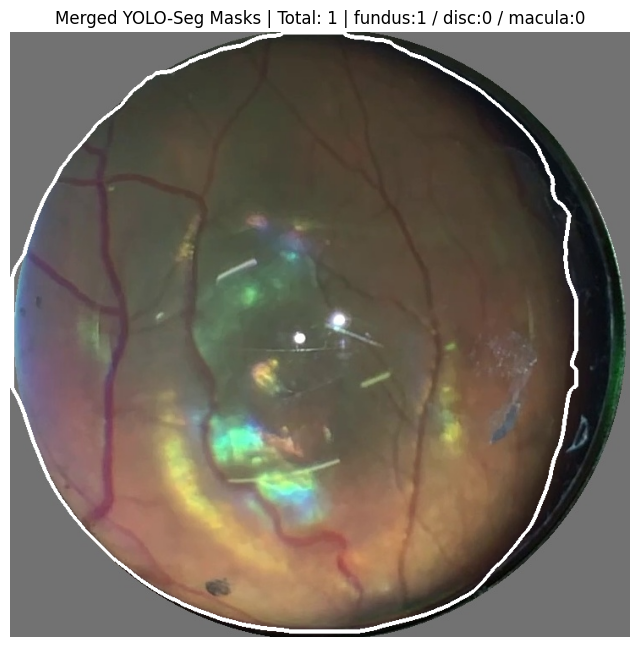

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from collections import Counter
import os

# ===== 設定 =====
MODEL_PATH = r"C:\Users\ykita\ROP_AI_project\ROP_project\models\yolo11m-seg_1699+1702-1703_internal.pt"
IMAGE_PATH = r"C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image\IMG_0573_lens_internal\IMG_0573_0406.jpg"
CONF_THRES = 0.25
IOU_THRES  = 0.45
ALPHA      = 0.5

CLASS_NAMES = {0: "fundus", 1: "disc", 2: "macula"}
CLASS_COLORS_BGR = {0:(255,255,255), 1:(0,0,255), 2:(0,255,0)}  # BGR
bgr2rgb = lambda c: (c[2], c[1], c[0])

# ===== 画像読み込み =====
if not os.path.exists(IMAGE_PATH):
    raise FileNotFoundError(f"画像が見つかりません: {IMAGE_PATH}")
img_bgr = cv2.imread(IMAGE_PATH)
if img_bgr is None:
    raise RuntimeError(f"画像を読み込めません: {IMAGE_PATH}")
H, W = img_bgr.shape[:2]
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# ===== 推論 (retina_masks=True を追加) =====
model = YOLO(MODEL_PATH)
results = model(IMAGE_PATH, conf=CONF_THRES, iou=IOU_THRES, save=False,
                retina_masks=True, verbose=False)

overlay = img_rgb.copy()
outline_img = overlay.copy()

total_dets = 0
cls_counter = Counter()
conf_list_by_cls = {k: [] for k in CLASS_NAMES}

detected = False
for r in results:
    if r.masks is None or r.boxes is None or len(r.masks.data) == 0:
        continue

    masks = r.masks.data.cpu().numpy().astype(np.uint8)  # すでに (H, W) サイズ
    cls_ids = r.boxes.cls.cpu().numpy().astype(int)
    confs   = r.boxes.conf.cpu().numpy()

    n = min(len(masks), len(cls_ids), len(confs))
    for i in range(n):
        cls_id = int(cls_ids[i])
        if cls_id not in CLASS_NAMES:
            continue

        mask = masks[i]
        if mask.max() == 0:
            continue

        detected = True
        total_dets += 1
        cls_counter[cls_id] += 1
        conf_list_by_cls[cls_id].append(float(confs[i]))

        color_rgb = bgr2rgb(CLASS_COLORS_BGR.get(cls_id, (255,255,0)))
        color_bgr = CLASS_COLORS_BGR.get(cls_id, (0,255,255))

        # 半透明塗り
        m = mask.astype(bool)
        overlay[m] = (
            overlay[m] * (1 - ALPHA) + np.array(color_rgb, dtype=np.float32) * ALPHA
        ).astype(np.uint8)

        # 輪郭
        m255 = (mask * 255).astype(np.uint8)
        contours, _ = cv2.findContours(m255, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        tmp_bgr = cv2.cvtColor(outline_img, cv2.COLOR_RGB2BGR)
        cv2.drawContours(tmp_bgr, contours, -1, color_bgr, thickness=3)
        outline_img = cv2.cvtColor(tmp_bgr, cv2.COLOR_BGR2RGB)

# ===== デバッグ出力 =====
if detected:
    print(f"[INFO] 総検出数: {total_dets}")
    for cid in sorted(CLASS_NAMES):
        cnt = cls_counter.get(cid, 0)
        confs = sorted(conf_list_by_cls[cid], reverse=True)
        top5 = ", ".join([f"{c:.3f}" for c in confs[:5]]) if confs else "-"
        print(f"  - {cid} ({CLASS_NAMES[cid]}): {cnt} 件 | conf 上位: {top5}")
else:
    print("[INFO] 検出なし（confを下げると出る可能性あり）")

# ===== 表示 =====
title_counts = " / ".join([f"{CLASS_NAMES[c]}:{cls_counter.get(c,0)}" for c in sorted(CLASS_NAMES)])
fig_title = f"Merged YOLO-Seg Masks | Total: {total_dets} | {title_counts}" if detected else "No masks detected"

plt.figure(figsize=(8, 8))
plt.imshow(outline_img if detected else img_rgb)
plt.axis('off')
plt.title(fig_title)
plt.show()
